In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ssgpr import SSGPR

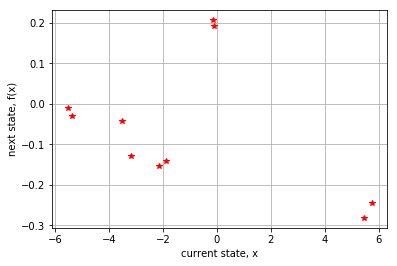

In [2]:
K = 10
var_input = 0.02
upper = 2*np.pi
lower = -2*np.pi
train_x = np.random.uniform(lower,upper,K)

fx = 0.2*np.sin(train_x) + 0.2*np.cos(0.5*np.sqrt(2)*train_x)
train_y = np.random.normal(fx, var_input)

train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)

plt.figure(1)
plt.plot(train_x, train_y, '*', color='red')
plt.xlabel("current state, x")
plt.ylabel("next state, f(x)")
plt.grid()

In [3]:
ssgpr = SSGPR(30)
ssgpr.add_data(train_x, train_y)

In [4]:
ssgpr.optimise(restarts=3, method="BFGS", opt_spectral=False)

***************************************************
*              Optimizing parameters              *
***************************************************
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,)
(33,

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
%debug

In [ ]:
Xs = np.linspace(lower-1,upper+1,100).reshape(-1,1)
Ys, std = ssgpr.predict(Xs)
W = ssgpr.sample_posterior_weights(5)
samp_p = ssgpr.predict_with_posterior_sample(Xs, W)
ssgpr.print_hyperparams()

In [ ]:
ssgpr.rff.W.shape

In [ ]:
plt.figure(1)
plt.plot(train_x, train_y, '*', color='red')
plt.plot(Xs, samp_p, '--')
plt.fill_between(Xs[:,0], Ys[:,0] + 2*std, Ys[:,0] - 2*std, facecolor = 'orange', alpha = 0.25)
plt.plot(Xs, Ys, 'g')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel("input, x")
plt.ylabel("f(x)")
plt.grid()